In [34]:
import sys
import os
import talib 

# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join('..', '..')))




In [35]:
from src.data_loader import load_stock_data
filepath = r'C:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\data\yfinance_data\AAPL_historical_data.csv'
df_aapl = load_stock_data(filepath)
print(df_aapl.head())

✅ Pandas valid dates: 10998 / 10998
✅ Total valid after dateutil: 10998 / 10998
                  Date      Open      High       Low     Close  Adj Close  \
0  1980-12-12 00:00:00  0.128348  0.128906  0.128348  0.128348   0.098943   
1  1980-12-15 00:00:00  0.122210  0.122210  0.121652  0.121652   0.093781   
2  1980-12-16 00:00:00  0.113281  0.113281  0.112723  0.112723   0.086898   
3  1980-12-17 00:00:00  0.115513  0.116071  0.115513  0.115513   0.089049   
4  1980-12-18 00:00:00  0.118862  0.119420  0.118862  0.118862   0.091630   

      Volume  Dividends  Stock Splits  
0  469033600        0.0           0.0  
1  175884800        0.0           0.0  
2  105728000        0.0           0.0  
3   86441600        0.0           0.0  
4   73449600        0.0           0.0  


In [36]:
from src.date_range import print_all_date_ranges
stock_dfs = {
    'AAPL': df_aapl
}

print_all_date_ranges(stock_dfs)

AAPL: 1980-12-12 to 2024-07-30


In [37]:
# Assume your DataFrame is called df_news
# AAPL headline date range: 2020-03-09 to 2020-06-10

df_aapl_news = df_aapl[
    (df_aapl['Date'] >= '2020-03-09') &
    (df_aapl['Date'] <= '2020-06-10')
]


In [38]:
from src.date_range import print_all_date_ranges
stock_dfs = {
    'AAPL': df_aapl_news
}

print_all_date_ranges(stock_dfs)

AAPL: 2020-03-09 to 2020-06-10


In [39]:
from src.missing_date import find_missing_dates
missing_dates = find_missing_dates(
    df_aapl_news,
    date_col='Date',
    start_date='2020-03-09',
    end_date='2020-06-10',
    freq='D'
)

print("Missing dates:")
print(missing_dates)
print(f"Total missing: {len(missing_dates)}")


Missing dates:
DatetimeIndex(['2020-03-14', '2020-03-15', '2020-03-21', '2020-03-22',
               '2020-03-28', '2020-03-29', '2020-04-04', '2020-04-05',
               '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-18',
               '2020-04-19', '2020-04-25', '2020-04-26', '2020-05-02',
               '2020-05-03', '2020-05-09', '2020-05-10', '2020-05-16',
               '2020-05-17', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-30', '2020-05-31', '2020-06-06', '2020-06-07'],
              dtype='datetime64[ns]', freq=None)
Total missing: 28


In [40]:
import yfinance as yf
import pandas as pd

missing_dates = [
    '2020-03-14', '2020-03-15', '2020-03-21', '2020-03-22',
    '2020-03-28', '2020-03-29', '2020-04-04', '2020-04-05',
    '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-18',
    '2020-04-19', '2020-04-25', '2020-04-26', '2020-05-02',
    '2020-05-03', '2020-05-09', '2020-05-10', '2020-05-16',
    '2020-05-17', '2020-05-23', '2020-05-24', '2020-05-25',
    '2020-05-30', '2020-05-31', '2020-06-06', '2020-06-07'
]

ticker = yf.Ticker('AAPL')

for date in missing_dates:
    # yfinance end date is exclusive, so add one day
    df = ticker.history(start=date, end=pd.to_datetime(date) + pd.Timedelta(days=1))
    if not df.empty:
        print(f"Data found for {date}:")
        print(df)
    else:
        print(f"No data for {date}")



$AAPL: possibly delisted; no price data found  (1d 2020-03-14 -> 2020-03-15 00:00:00)


No data for 2020-03-14

$AAPL: possibly delisted; no price data found  (1d 2020-03-15 -> 2020-03-16 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-03-21 -> 2020-03-22 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-03-22 -> 2020-03-23 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-03-28 -> 2020-03-29 00:00:00)



No data for 2020-03-15
No data for 2020-03-21
No data for 2020-03-22
No data for 2020-03-28


$AAPL: possibly delisted; no price data found  (1d 2020-03-29 -> 2020-03-30 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-04-04 -> 2020-04-05 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-04-05 -> 2020-04-06 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-04-10 -> 2020-04-11 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-04-11 -> 2020-04-12 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-04-12 -> 2020-04-13 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-04-18 -> 2020-04-19 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-04-19 -> 2020-04-20 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-04-25 -> 2020-04-26 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-04-26 -> 2020-04-27 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-05-02 -> 2020-05-03 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 202

No data for 2020-03-29
No data for 2020-04-04
No data for 2020-04-05
No data for 2020-04-10
No data for 2020-04-11
No data for 2020-04-12
No data for 2020-04-18
No data for 2020-04-19
No data for 2020-04-25
No data for 2020-04-26
No data for 2020-05-02
No data for 2020-05-03
No data for 2020-05-09
No data for 2020-05-10
No data for 2020-05-16


$AAPL: possibly delisted; no price data found  (1d 2020-05-17 -> 2020-05-18 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-05-23 -> 2020-05-24 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-05-24 -> 2020-05-25 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-05-25 -> 2020-05-26 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-05-30 -> 2020-05-31 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-05-31 -> 2020-06-01 00:00:00)


No data for 2020-05-17
No data for 2020-05-23
No data for 2020-05-24
No data for 2020-05-25
No data for 2020-05-30
No data for 2020-05-31


$AAPL: possibly delisted; no price data found  (1d 2020-06-06 -> 2020-06-07 00:00:00)


$AAPL: possibly delisted; no price data found  (1d 2020-06-07 -> 2020-06-08 00:00:00)


No data for 2020-06-06
No data for 2020-06-07



**This output confirms:**

All these missing dates are non-trading days (weekends or U.S. stock market holidays).

yfinance will not return any trading data for these dates, because the market is closed.

In [41]:
print("Null values count per column:")
print(df_aapl.isnull().sum())


Null values count per column:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


no valuse is null. ready to go!

In [42]:
df_aapl.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,10998,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,1.099800e+04,10998.000000,10998.000000
mean,2002-09-26 14:14:28.085106304,22.299160,22.539055,22.068367,22.312754,21.494496,3.180806e+08,0.000752,0.001546
min,1980-12-12 00:00:00,0.049665,0.049665,0.049107,0.049107,0.037857,0.000000e+00,0.000000,0.000000
25%,1991-10-28 06:00:00,0.299107,0.303710,0.290179,0.298549,0.241840,1.132545e+08,0.000000,0.000000
50%,2002-09-23 12:00:00,0.531250,0.537946,0.522321,0.531250,0.432079,2.057412e+08,0.000000,0.000000
75%,2013-08-25 06:00:00,20.204196,20.389554,19.998036,20.196160,17.253029,3.985275e+08,0.000000,0.000000
max,2024-07-30 00:00:00,236.479996,237.229996,233.089996,234.820007,234.548523,7.421641e+09,0.250000,7.000000
std,NaN,46.003685,46.496031,45.540929,46.037660,45.561916,3.354523e+08,0.011753,0.083663


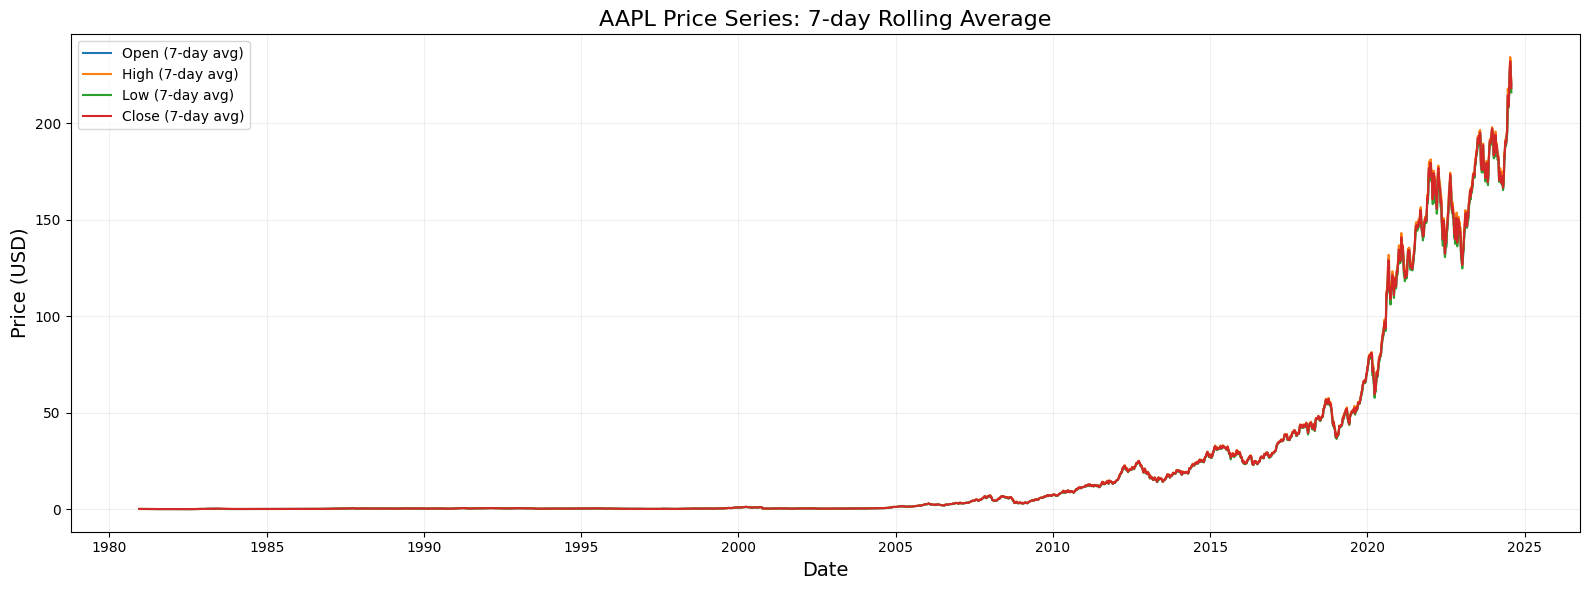

In [43]:
import matplotlib.pyplot as plt
from src.visualization import get_rolling_series

plt.figure(figsize=(16, 6))

for col in ['Open', 'High', 'Low', 'Close']:
    rolling_series = get_rolling_series(df_aapl, value_col=col, window=7)
    plt.plot(
        rolling_series.index, 
        rolling_series.values, 
        label=f"{col.title()} (7-day avg)"
    )

plt.title("AAPL Price Series: 7-day Rolling Average", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


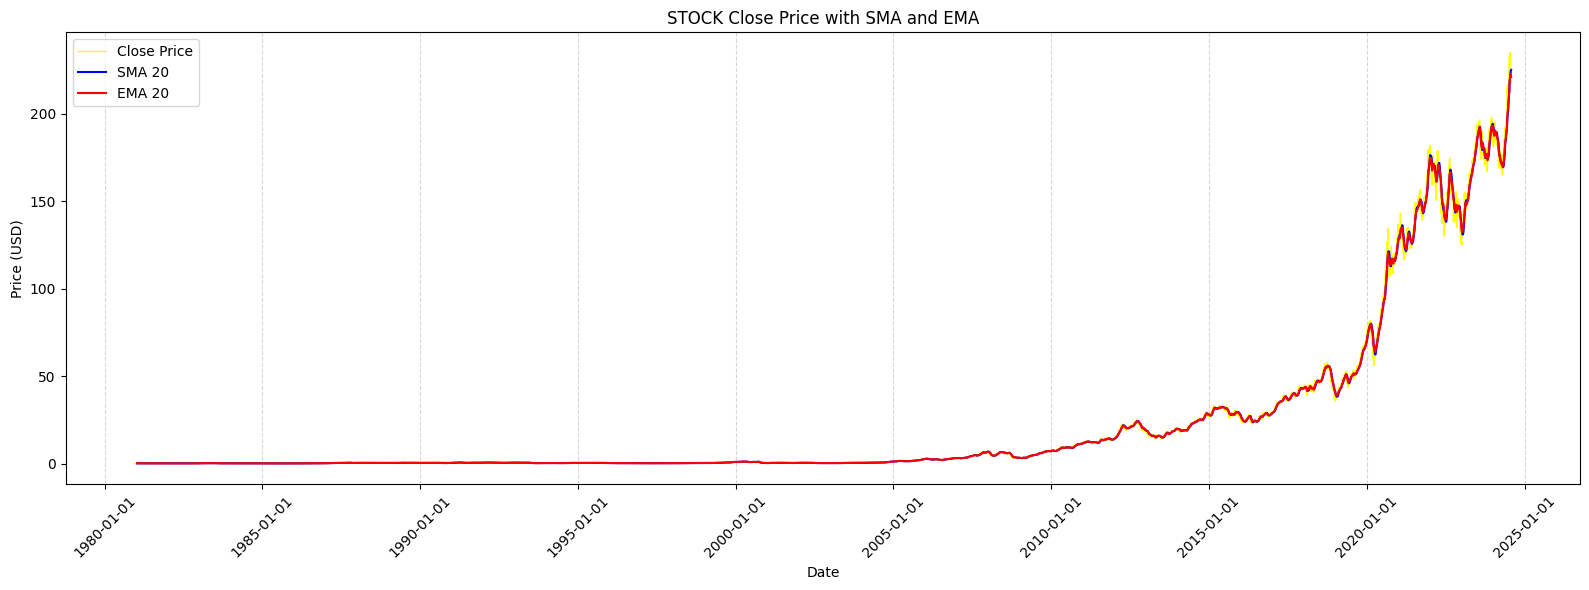

In [44]:
from src.plot_ma import plot_ma
plot_ma(df_aapl, 'Close')

### Long-Term Stock Price with SMA and EMA – Detailed Analysis

- **Time Span and Context:**  
  This chart covers several decades of stock price history, likely from the early 1980s to 2025, making it a powerful visualization of long-term growth and market dynamics.

- **Trend Overview:**  
  For much of the early period (1980s–2000s), the price remains almost flat and close to zero, reflecting either lack of trading volume, company infancy, or very low valuation.  
  Starting around 2010, the stock enters a period of **exponential growth**, with the price rising sharply and consistently—typical of major technology leaders in the last two decades.

- **Explosive Growth Phase (2015–2025):**  
  - The most significant price appreciation occurs in the last decade.  
  - Both the SMA 20 (blue) and EMA 20 (red) track the closing price closely, with the EMA reacting slightly faster to sharp moves.
  - The moving averages confirm the long-term uptrend, turning upward in tandem with each new rally.

- **Volatility and Corrections:**  
  The price line shows periods of high volatility—sudden dips followed by rapid recoveries—especially after 2015.  
  These corrections are short-lived, and each is followed by a stronger rally, showing the company’s resilience and continued investor confidence.

- **Moving Average Insights:**  
  - When the price is **well above both the SMA and EMA**, it suggests strong bullish momentum, but can sometimes precede short-term corrections.
  - During sharp corrections, the price may dip to or briefly below the moving averages, which act as dynamic support levels before the next uptrend resumes.
  - The EMA (red) is more responsive to recent price changes, signaling trend reversals before the SMA (blue).

- **What This Means for Analysis:**  
  - The chart illustrates a textbook example of **compounding returns** and the power of long-term investing in growth stocks.
  - The alignment and spacing of price and moving averages can be used to identify overbought/oversold conditions, trend reversals, and optimal entry/exit points for investors or models.
  - These patterns are valuable both for technical analysis and for designing predictive features in machine learning models.

- **Summary Statement:**  
  This long-term chart demonstrates how transformational companies can create enormous shareholder value over decades. The moving averages provide ongoing confirmation of trend strength and help navigate short-term volatility. For your project, this visualization supports both narrative storytelling (growth story) and data-driven analytics (trend/trading signals, investment strategy backtesting).


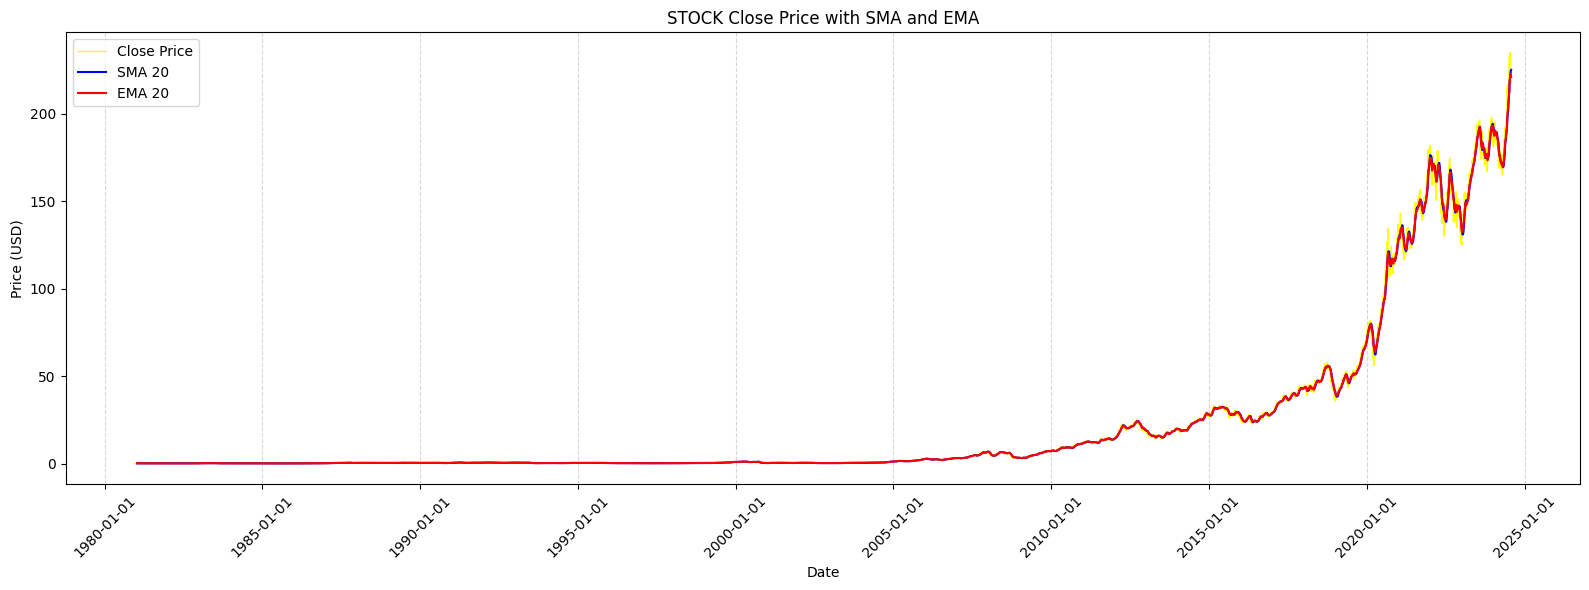

In [45]:
from src.plot_ma import plot_ma
plot_ma(df_aapl, 'Close')

## Interpreting Technical Indicators with TA-Lib: SMA, EMA, and Price Trend

The graph above overlays three key lines for AAPL stock:
- **Close Price** (black): The actual market closing price of AAPL for each trading day.
- **SMA 20** (blue): The 20-day Simple Moving Average, which calculates the unweighted average of the previous 20 closing prices for each point in time.
- **EMA 20** (red): The 20-day Exponential Moving Average, which is similar to the SMA but gives more weight to recent prices, making it more responsive to new market information.

**TA-Lib** is a widely-used library for financial technical analysis. It computes indicators like SMA and EMA, which traders and analysts use to understand price trends, identify potential buy or sell signals, and smooth out short-term volatility in market data.

##### Both the SMA and EMA are trending up, confirming a bullish trend.

The lines stay in order: yellow (price) > red (EMA) > blue (SMA), a classic sign of a strong and established uptrend.

**Signals:**
When the price crosses above the moving averages, it’s often seen as a “buy” signal.
When it’s below, it’s a “sell” signal.

**Momentum:**
The bigger the gap between the yellow line and the moving averages, the stronger the trend (but sometimes this can mean the stock is “overbought” and may pull back soon).


### Key Insights from the Plot:
1. **Early Period (Left Side, March)**
The yellow line is dropping, meaning the stock price is falling.

Both moving averages (blue and red) follow the price down but react more slowly (they “smooth out” the ups and downs).

The SMA (blue) is a little slower and “smoother,” while the EMA (red) starts to turn up a bit earlier as prices bottom out.

2. **Middle Period (April–May)**
The stock price stops falling and starts rising steadily.

The moving averages begin to turn upward as well.

You can see the red EMA moves up slightly before the blue SMA—it’s more responsive.

The closing price (yellow) stays above both moving averages for most of this period, indicating a clear uptrend.

3. **Late Period (May–June)**
The yellow line continues climbing, and the gap between the closing price and the averages grows, showing strong upward momentum.


**In summary:** This visualization, powered by TA-Lib’s moving average calculations, allows you to detect overall trend direction, identify potential turning points, and gain a clearer view of price momentum for informed decision-making.


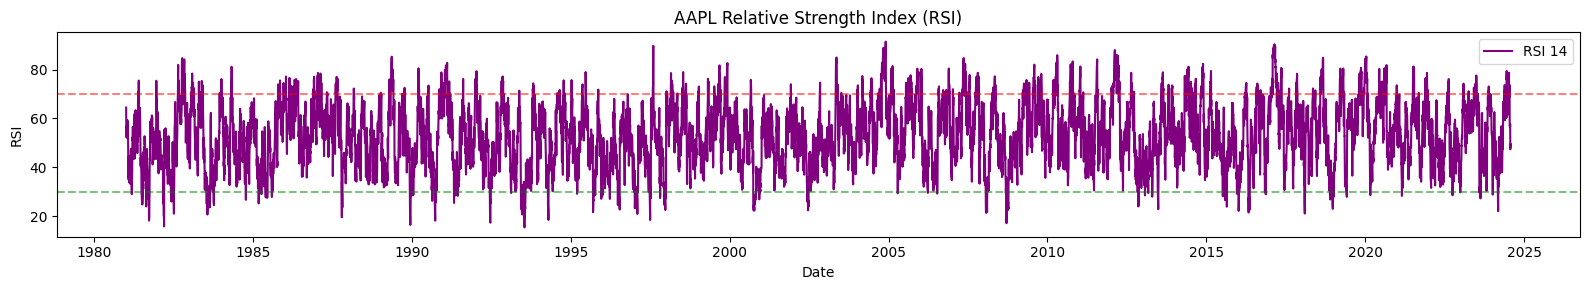

In [46]:
from src.plot_rsi import plot_rsi

# For Apple, using Close price:
plot_rsi(df_aapl, price_col='Close', ticker_name='AAPL')



## AAPL Relative Strength Index (RSI) Analysis

The chart displays the **14-period RSI** for Apple (AAPL) over several decades.  
RSI is a momentum oscillator that measures the speed and change of price movements—oscillating between **0 and 100**.

---

### 📏 Key Levels
- **70 (Red dashed line):**  
  - **Overbought threshold**  
  - When RSI rises above 70, AAPL is considered *overbought*—potentially due for a correction or pullback.
- **30 (Green dashed line):**  
  - **Oversold threshold**  
  - When RSI falls below 30, AAPL is considered *oversold*—potentially due for a rebound or upward reversal.

---

### 🕵️‍♂️ How to Interpret the Chart

1. **Volatility and Range**
   - The RSI fluctuates frequently between 20 and 80.
   - Rapid swings indicate strong momentum and frequent short-term shifts in buying/selling pressure.

2. **Overbought Zones (Above 70)**
   - Frequent touches above the red line show periods when AAPL’s price gained rapidly.
   - Not every overbought event leads to an immediate drop—sometimes the price continues climbing.
   - **Pro Tip:** Overbought does *not* always mean “sell now”—look for confirmation from other indicators.

3. **Oversold Zones (Below 30)**
   - Spikes below the green line highlight moments of sharp sell-offs or negative sentiment.
   - These periods sometimes precede a price bounce as value buyers step in.

4. **Long-term Patterns**
   - Across decades, AAPL’s RSI cycles reflect both the company’s growth surges and occasional setbacks.
   - No prolonged period stays overbought or oversold—momentum eventually reverses.

5. **Mean Reversion**
   - RSI tends to gravitate toward the midpoint (around 50), reflecting a balance between bullish and bearish pressures over time.

---

### 💡 Practical Takeaways

- **Short-term traders:** Use RSI to spot potential overbought/oversold reversals.
- **Long-term investors:** RSI can flag good entry points during sharp sell-offs (RSI < 30) or warn of short-term overheating (RSI > 70).
- **Best practice:** Combine RSI with other signals (trendlines, moving averages, volume) to confirm entries/exits.

---

> **Summary:**  
> RSI is a powerful momentum tool. For AAPL, it captures both the wild rides of tech booms and the panic of occasional corrections. Watching for extreme readings—*and using them wisely*—can help traders and investors time their moves more effectively.


c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_rsi.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[rsi_col] = talib.RSI(df[price_col], timeperiod=rsi_period)


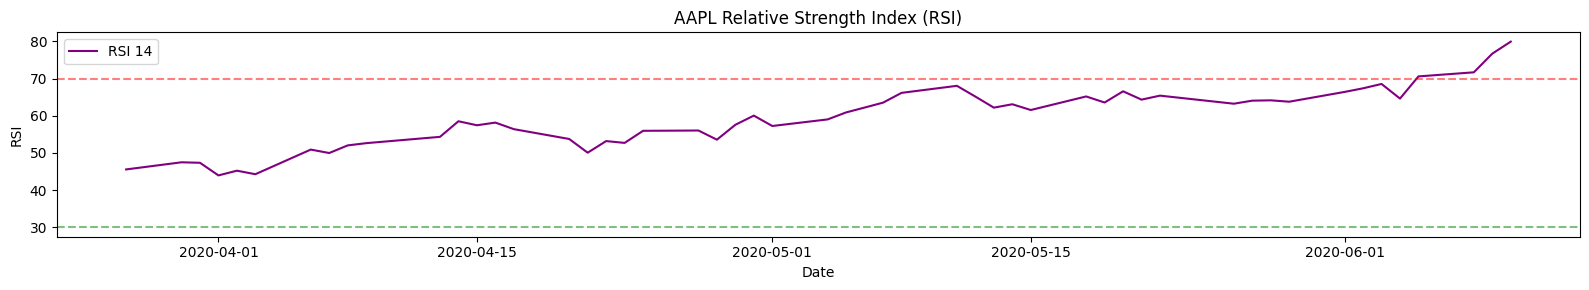

In [47]:
from src.plot_rsi import plot_rsi

# For Apple, using Close price:
plot_rsi(df_aapl_news, price_col='Close', ticker_name='AAPL')




## Interpreting the Relative Strength Index (RSI) with TA-Lib

The graph above visualizes the **14-day Relative Strength Index (RSI)** for AAPL, a momentum oscillator computed by TA-Lib. RSI is a popular indicator used by traders to measure the speed and magnitude of recent price changes.

- **RSI 14 (purple line):** This shows the relative strength over a 14-day period, ranging from 0 to 100.
- **Overbought threshold (red dashed line at 70):** When the RSI is above 70, it signals that the stock may be overbought or overvalued, and a price correction or pullback could be imminent.
- **Oversold threshold (green dashed line at 30):** When the RSI is below 30, it suggests that the stock may be oversold or undervalued, indicating a possible rebound or buying opportunity.

### Key Insights from the RSI Plot:

**April – Early May:**

RSI climbs gradually from about 45 to the high 50s/60s.

This means the stock was gaining strength, but not yet **“overbought.”**

**Mid-May – Early June:**

RSI stays mostly between 60 and 70, showing the stock is strong but not crazy high.

Close to **“overbought”** but still in the **“healthy uptrend”** range.

**Early June Onward:**

RSI crosses above 70—now officially in the **“overbought”** zone.

**End of chart:** RSI jumps to nearly 80, a sign the stock **has been really strong** for a while.


**Signal detection:**

When RSI crosses above 70 → mark as “potential overbought” (maybe risky to buy more here).

When RSI crosses below 30 (not shown here) → mark as “potential oversold.”




c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_macd.py:58: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


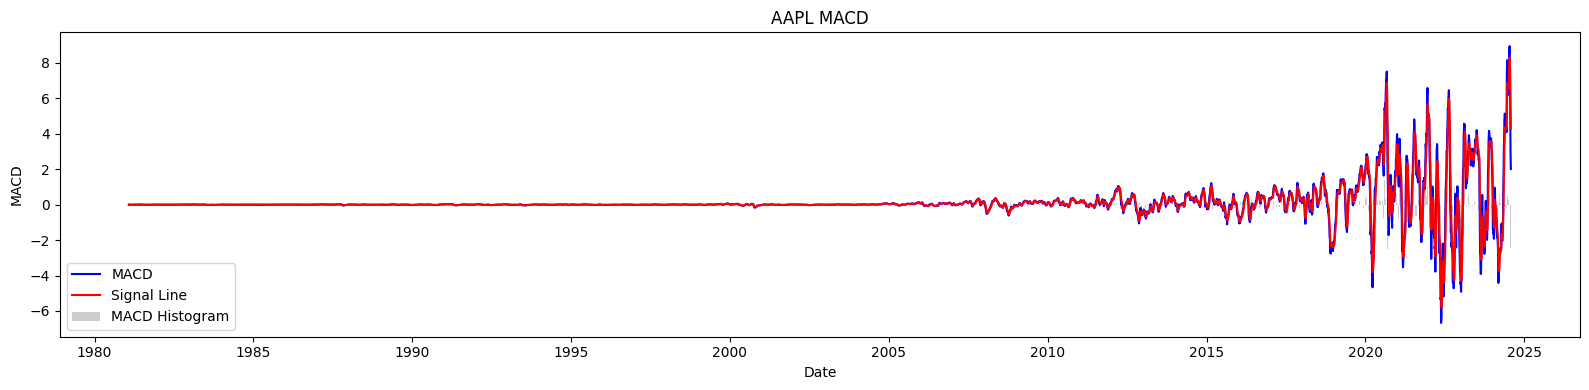

In [48]:
from src.plot_macd import plot_macd

# For Apple with Close price
plot_macd(df_aapl, price_col='Close', ticker_name='AAPL')

## AAPL MACD (Moving Average Convergence Divergence) Analysis

This chart shows the **MACD** indicator for Apple (AAPL) across decades, featuring:

- **MACD Line (Blue):** Difference between the 12-day and 26-day EMAs.
- **Signal Line (Red):** 9-day EMA of the MACD Line.
- **MACD Histogram (Grey):** Visualizes the gap between MACD and Signal lines (not very visible due to scale, but present).



### 1. **MACD Line vs. Signal Line**
- **When MACD crosses above the Signal Line:**  
  - **Bullish signal**—suggests momentum is turning positive; possible *buy* opportunity.
- **When MACD crosses below the Signal Line:**  
  - **Bearish signal**—momentum is weakening; possible *sell* or *caution* sign.
- In your chart, these crossovers become more prominent from around 2010 onwards, aligning with Apple's explosive growth and more active trading.



### 2. **Increasing Volatility & Trend Strength**
- From 2000 to 2024, the amplitude of MACD swings increases:
    - **Why?** Apple became a global tech giant; more liquidity, bigger price swings, and stronger investor reactions to news/events.
- The MACD moves sharply up during bull runs (e.g., post-2010, 2020 tech rally) and dives deep during corrections.



### 3. **Zero Line (Baseline)**
- **Above zero:** Indicates upward price momentum (bullish trend).
- **Below zero:** Indicates downward price momentum (bearish trend).
- In later years, AAPL spends longer above zero—signaling prolonged uptrends.



### 4. **Histogram (Bar Plot)**
- **Bars above zero:** MACD is above Signal—momentum is bullish.
- **Bars below zero:** MACD is below Signal—momentum is bearish.
- The histogram amplifies visually during periods of strong price momentum—though in this chart, scale makes it harder to see.



###  **Practical Takeaways**
- **Crossover signals:** Use for entry/exit timing—look for confirmation from other indicators (like RSI or volume).
- **Strength of swings:** Big gaps between MACD and Signal mean strong trends—opportunities for trend traders.
- **Context is king:** Always combine MACD signals with trend context and fundamentals for Apple.



> **Summary:**  
> The MACD is a *momentum powerhouse*. For AAPL, it tracks both the explosive bull runs and sharp corrections, growing more powerful as Apple became a dominant force. Use MACD crossovers and zero-line moves as key trading signals, but always look for confirmation and watch for “whipsaws” (false signals) during choppy markets.


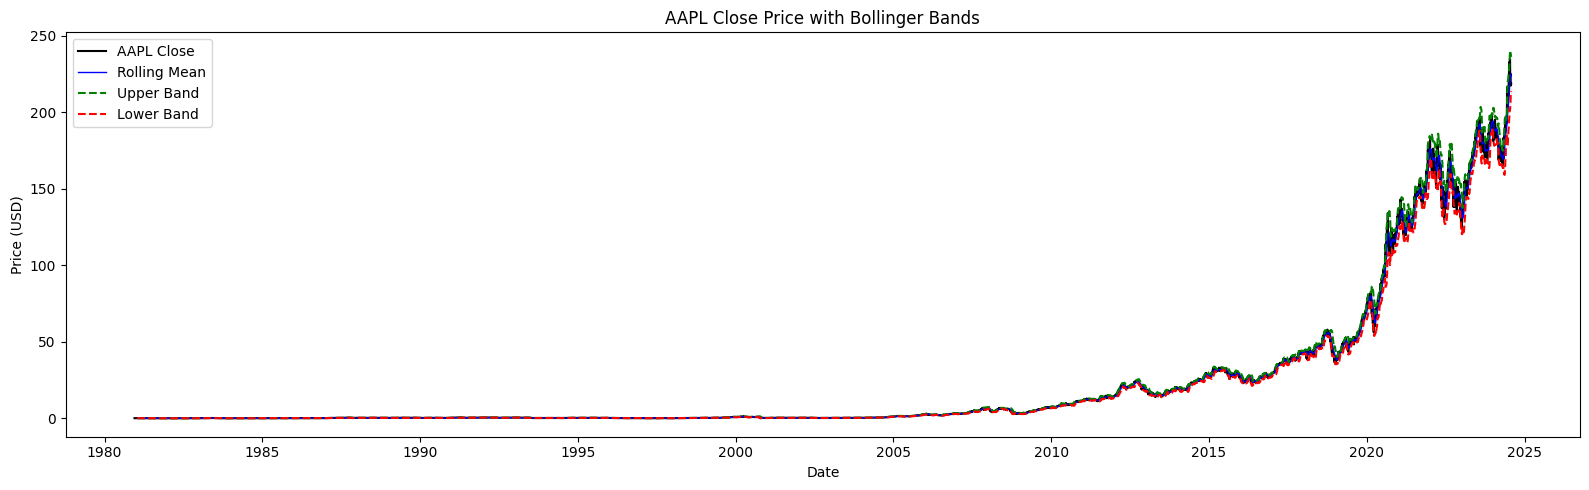

In [49]:
from src.plot_bolinger import plot_bollinger_bands

# Example usage (for AAPL)
plot_bollinger_bands(df_aapl, column='Close', stock_name='AAPL')

## 📊 AAPL Close Price with Bollinger Bands — Analysis

This chart visualizes Apple’s (AAPL) long-term closing price with **Bollinger Bands**—a classic technical indicator used to measure price volatility and identify potential overbought/oversold conditions.

---

### 🔍 What’s Shown?
- **Black line:** AAPL closing price
- **Blue line:** Rolling Mean (usually 20-period SMA)
- **Green dashed line:** Upper Bollinger Band (Mean + 2×Std Dev)
- **Red dashed line:** Lower Bollinger Band (Mean - 2×Std Dev)

---

### 🧠 How to Interpret Bollinger Bands

#### 1. **Price Volatility and Trend**
- When bands are **narrow**, volatility is low (quiet periods).
- When bands **expand**, volatility surges (big price moves, often after breakouts).
- Notice how the bands widened dramatically after 2015—reflecting Apple’s growing size and price swings.

#### 2. **Mean Reversion (Price Magnet)**
- Price tends to “revert” back to the rolling mean (blue line).
- **Touches/Breaks upper band:** Market may be overbought—possible slowdown or short-term pullback.
- **Touches/Breaks lower band:** Market may be oversold—potential for rebound or rally.
- These “touches” are not always instant reversal signals, but often mark *extremes* in sentiment.

#### 3. **Trend Confirmation**
- **Persistent price above mean and hugging upper band:** Strong uptrend.
- **Persistent price below mean and hugging lower band:** Strong downtrend (less common for AAPL in recent decades).

#### 4. **Squeeze and Expansion**
- **Band Squeeze:** Bands become very tight. Indicates a period of consolidation—often a precursor to a sharp move.
- **Band Expansion:** Rapidly widening bands. Indicates a surge in volatility, often after earnings, major news, or a market-wide event.

---

### 📈 Big Picture Takeaways

- **Apple’s meteoric rise** since 2010 is reflected in both price and increasingly wide bands—signaling strong, persistent uptrends and large price swings.
- **Bollinger Bands work best in combination** with other indicators (MACD, RSI, volume) for confirming entries/exits.
- For AAPL, price often rides the upper band during strong bull runs—showing just how powerful momentum can be in a market leader.

---

> **Summary:**  
> Bollinger Bands capture Apple’s evolution from a niche tech company to a global juggernaut. Use the bands to spot volatility shifts, potential exhaustion points, and confirmation of price trends—always in context with other signals!


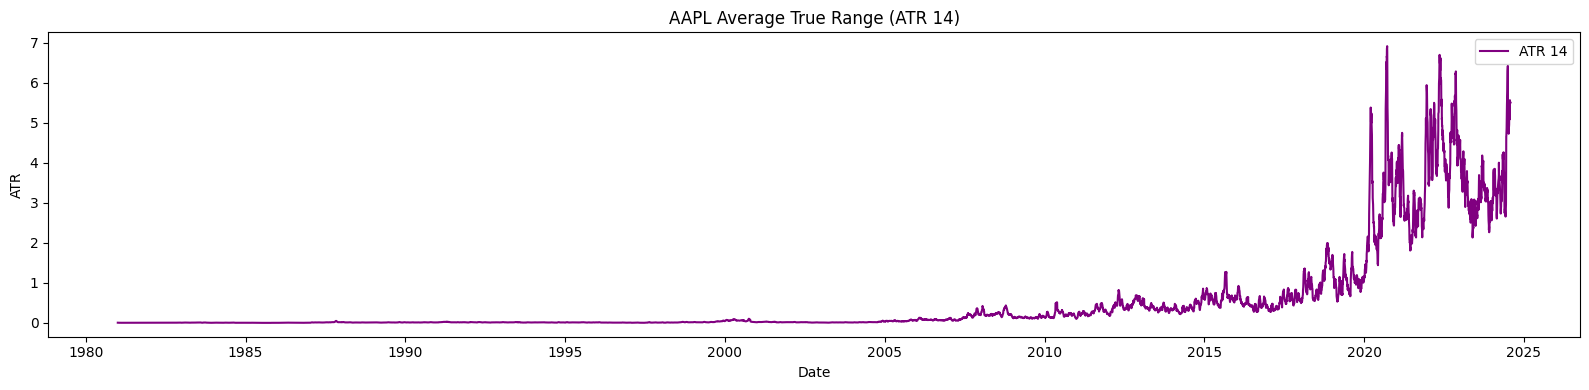

In [50]:
from src.ATR import plot_atr

# For Apple (AAPL)
plot_atr(df_aapl, window=14, stock_name='AAPL')